In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.parser import parse

import seaborn as sns
sns.set()

%matplotlib inline


In [2]:
#Data directories
popdir = 'C:\\Users\\mlamherr\\Data'
savedir = 'C:\\Users\\mlamherr\\Data'

In [3]:
#Bus areas 1-16 in numerical order as case10K file
WA = ['AVA', 'BPAT','CHPD','DOPD','GCPD','PSEI','SCL','TPWR','AVA', 'BPAT']
OR = ['BPAT','GRID','IPCO','PACW','PGE']
CAnorth = ['BANC','CISO','PACW','BPAT']
CABayArea = ['CISO']
CAcentral = ['CISO', 'TIDC']
CAsw = ['CISO', 'LDWP']
CAse = ['CISO', 'IID']
NV = ['NEVP']
AZ = ['AZPS','DEAA','GRIF','GRMA','HGMA','PNM','SRP','TEPC','WALC']
UT = ['PACE']
NM = ['EPE','PNM']
CO = ['PSCO','WACM']
WY = ['PACE','WACM']
ID = ['AVA','BPAT','IPCO','PACE']
MT = ['BPAT','GWA','NWMT','WAUW','WWA'] 
ElPaso = ['EPE']

BA_all = sorted(list(set().union(WA,OR,CAnorth,CABayArea,CAcentral,CAsw,CAse,NV,AZ,UT,NM,CO,WY,ID,MT,ElPaso)))

In [4]:
Northern_California = ['Butte','Colusa','Del Norte','El Dorado','Glenn','Humboldt',
                       'Lake','Lassen','Mendocino','Modoc','Nevada','Placer','Plumas',
                       'Sacramento','Shasta','Sierra','Siskiyou','Sutter','Tehama',
                       'Trinity','Yolo','Yuba']
Bay_Area = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo',
            'Santa Clara','Santa Cruz','Solano','Sonoma']
Central_California = ['Alpine','Amador','Calaveras','Fresno','Inyo','Kings','Madera',
                      'Mariposa','Merced','Mono','Monterey','San Benito','San Joaquin',
                      'Stanislaus','Tulare','Tuolumne']
Southeast_California = ['Imperial','Orange','Riverside','San Bernardino','San Diego']
Southwest_California = ['Kern','Los Angeles','San Luis Obispo','Santa Barbara','Ventura']

CA = [Northern_California, Bay_Area, Central_California, Southeast_California, Southwest_California]
CAnames = ['Northern_California', 'Bay_Area', 'Central_California', 'Southeast_California', 'Southwest_California']
CA_all = Northern_California + Bay_Area + Central_California + Southeast_California +Southwest_California
CA_union = list(set().union(Northern_California, Bay_Area, Central_California, Southeast_California, Southwest_California))
shortCAnames = ['CAnorth','CABayArea','CAcentral','CAsw','CAse']

numCounties = 0
for x in zip(CAnames,CA):
    print('There are '+ str(len(x[1])) + ' counties in region ' + x[0])
    numCounties = numCounties + len(x[1])
print('There are ' + str(numCounties) + ' total counties in California.')


There are 22 counties in region Northern_California
There are 10 counties in region Bay_Area
There are 16 counties in region Central_California
There are 5 counties in region Southeast_California
There are 5 counties in region Southwest_California
There are 58 total counties in California.


In [5]:
# CA regions: get populations of demand regions

CA_population_file = 'Web_ACS2016_Pop-Race.xlsx'
df = pd.read_excel(io = popdir + "/" + CA_population_file, sheet_name='Total Pop & Median Age', skiprows=[0,1,2,3,4])


In [6]:
df.head()

,Geography,Estimate,Margin of Error,Estimate.1,Margin of Error.1,Unnamed: 5,Summary Level,County,Place
0,California,39250017,*****,36.4,0.2,NaN,40,NaN,NaN
1,Alameda County,1647704,*****,37.4,0.2,NaN,50,1.0,NaN
2,Alameda city,78907,29,42.2,2.1,NaN,160,1.0,562.0
3,Berkeley city,121241,34,32.1,1.6,NaN,160,1.0,6000.0
4,Castro Valley CDP,65153,4863,43.1,2.9,NaN,160,1.0,11964.0


In [7]:
df.columns

Index(['Geography', 'Estimate', 'Margin of Error', 'Estimate.1',
       'Margin of Error.1', 'Unnamed: 5', 'Summary Level', 'County', 'Place'],
      dtype='object')

In [8]:
df.drop(columns =['Margin of Error', 'Estimate.1',
       'Margin of Error.1', 'Unnamed: 5', 'Summary Level', 'County', 'Place'], inplace=True)

In [9]:
df.head()

,Geography,Estimate
0,California,39250017
1,Alameda County,1647704
2,Alameda city,78907
3,Berkeley city,121241
4,Castro Valley CDP,65153


In [10]:
counties = df.loc[df['Geography'].str.contains('County')][['Geography','Estimate']]
counties = counties.reset_index(drop=True)

In [11]:
counties['Geography'] = counties['Geography'].str.replace(' County','')
counties.head()

,Geography,Estimate
0,Alameda,1647704
1,Butte,226864
2,Contra Costa,1135127
3,El Dorado,185625
4,Fresno,979915


Some counties do not have population data (from this source) because they have less than 65000 residents. There are total of 58 counties but only 40 have >65000 in 2016.

In [12]:
intersection = set(counties['Geography']) & set(pd.Series(CA_union))
union = set(counties['Geography']) | set(pd.Series(CA_union))
print('These 18 counties in CA have no population data')
print(set(union - intersection))  ## counties with < 65000 in 2016
print()
print('Counties with missing population data are in Northern and Central CA. ')

These 18 counties in CA have no population data
{'Glenn', 'Modoc', 'Inyo', 'Amador', 'Alpine', 'Calaveras', 'Mono', 'San Benito', 'Tuolumne', 'Plumas', 'Del Norte', 'Siskiyou', 'Lassen', 'Sierra', 'Colusa', 'Mariposa', 'Tehama', 'Trinity'}

Counties with missing population data are in Northern and Central CA. 


In [13]:
#Dictionary for region population counts
popcount = {}
for i in zip(shortCAnames, CA):
    region_name = i[0]
    region_county_list = i[1]
    popcount[region_name] = counties[counties['Geography'].isin(region_county_list)]['Estimate'].sum()
  

In [14]:
popcount

{'CAnorth': 3262336,
 'CABayArea': 7958684,
 'CAcentral': 3724007,
 'CAsw': 11199001,
 'CAse': 12601498}

In [15]:
#Add other population data cut and paste from the sources mentioned above.
#To do: The US Census data is automatable; not about El Paso yet
popcount['WA']=7280934
popcount['OR']=4085989
popcount['NV']=2939254
popcount['AZ']=6908642
popcount['UT']=3044321
popcount['NM']=2085432
popcount['CO']=5530105
popcount['WY']=584910
popcount['ID']=1680026
popcount['MT']=1038656
popcount['ElPaso']=678058

In [16]:
popcount

{'CAnorth': 3262336,
 'CABayArea': 7958684,
 'CAcentral': 3724007,
 'CAsw': 11199001,
 'CAse': 12601498,
 'WA': 7280934,
 'OR': 4085989,
 'NV': 2939254,
 'AZ': 6908642,
 'UT': 3044321,
 'NM': 2085432,
 'CO': 5530105,
 'WY': 584910,
 'ID': 1680026,
 'MT': 1038656,
 'ElPaso': 678058}

In [17]:
ba2016 = pd.read_csv(savedir + "/" + 'BA_2016.csv' )

In [18]:
ba2016.index

RangeIndex(start=0, stop=8784, step=1)

In [19]:
ba2016.head()

,UTC Time,AVA,AZPS,BANC,BPAT,CHPD,CISO,DEAA,DOPD,EPE,...,PSEI,SCL,SRP,TEPC,TIDC,TPWR,WACM,WALC,WAUW,WWA
0,2016-01-01 00:00:00,1789.0,2982.0,1909.0,7689.0,325.0,23745.0,NaN,256.0,848.0,...,4238.0,1411.0,2730.0,1624.0,245.0,732.0,3254.0,838.0,108.0,NaN
1,2016-01-01 01:00:00,1930.0,3363.0,2028.0,8143.0,353.0,24213.0,NaN,282.0,948.0,...,4712.0,1488.0,3026.0,1801.0,256.0,784.0,3472.0,904.0,123.0,NaN
2,2016-01-01 02:00:00,1991.0,3642.0,2271.0,8634.0,371.0,25174.0,NaN,298.0,988.0,...,5085.0,1588.0,3262.0,1788.0,284.0,839.0,3448.0,948.0,110.0,NaN
3,2016-01-01 03:00:00,1970.0,3615.0,2301.0,8598.0,366.0,28423.0,NaN,293.0,959.0,...,5030.0,1551.0,3220.0,1763.0,285.0,837.0,3417.0,937.0,115.0,NaN
4,2016-01-01 04:00:00,1905.0,3568.0,2242.0,8390.0,365.0,28784.0,NaN,294.0,929.0,...,4845.0,1484.0,3142.0,1739.0,276.0,816.0,3374.0,922.0,112.0,NaN


Some BAs don't have any data for 2016. -- Check with EIA.

In [20]:
ba2016.isnull().sum()

UTC Time       0
AVA            0
AZPS           0
BANC           0
BPAT           0
CHPD           0
CISO           0
DEAA        8784
DOPD          16
EPE            0
GCPD           0
GRID        8784
GRIF        8784
GRMA        8784
GWA         8784
HGMA        8784
IID            0
IPCO           0
LDWP           0
NEVP           0
NWMT           0
PACE           0
PACW           0
PGE            0
PNM            0
PSCO           0
PSEI           0
SCL            0
SRP            0
TEPC           0
TIDC           0
TPWR           0
WACM           0
WALC           0
WAUW          24
WWA         8784
dtype: int64

EIA already imputes data up to 24 hours, i.e., if there is more than 24 consecutive hours of missing data, it does not impute beyond the first 24 points.

In [21]:
#Replace NA with 0's
ba2016.fillna(0, inplace=True)
ba2016.isnull().sum()

UTC Time    0
AVA         0
AZPS        0
BANC        0
BPAT        0
CHPD        0
CISO        0
DEAA        0
DOPD        0
EPE         0
GCPD        0
GRID        0
GRIF        0
GRMA        0
GWA         0
HGMA        0
IID         0
IPCO        0
LDWP        0
NEVP        0
NWMT        0
PACE        0
PACW        0
PGE         0
PNM         0
PSCO        0
PSEI        0
SCL         0
SRP         0
TEPC        0
TIDC        0
TPWR        0
WACM        0
WALC        0
WAUW        0
WWA         0
dtype: int64

In [22]:
#Shared BAs
totalCISO = popcount['CAnorth'] + popcount['CABayArea'] + popcount['CAcentral'] + popcount['CAsw'] + popcount['CAse']
totalBPAT = popcount['WA'] + popcount['OR'] + popcount['CAnorth'] + popcount['ID'] + popcount['MT']
totalAVA = popcount['ID']+popcount['WA']
totalPACW = popcount['OR']+popcount['CAnorth']
totalIPCO = popcount['OR']+popcount['ID']
totalPNM =  popcount['AZ']+popcount['NM']
totalPACE = popcount['UT']+popcount['WY']+popcount['ID']
totalEPE = popcount['ElPaso']+popcount['NM']
totalWACM = popcount['WY']+popcount['CO']

In [23]:
# Define region BA demand counts. 
# If a BA is entirely in region, give  all of that BA's count to the region
# If a BA is shared with other regions. get the fraction corresponding to the population fraction for that region
# BA sharing is found in Balancing_Authorities_JAN2017.pdf

#In region order:
ba2016['WA'] = ba2016['SCL'] + ba2016['PSEI'] + ba2016['TPWR'] + ba2016['CHPD'] + ba2016['DOPD'] + ba2016['GCPD'] + \
                ba2016['AVA']*popcount['WA']/totalAVA + ba2016['BPAT']*popcount['WA']/totalBPAT

ba2016['OR'] = ba2016['PGE'] + ba2016['GRID'] + \
                ba2016['PACW']*popcount['OR']/totalPACW + \
                ba2016['BPAT']*popcount['OR']/totalBPAT + \
                ba2016['IPCO']*popcount['OR']/totalIPCO

ba2016['CAnorth'] = ba2016['BANC'] + \
                ba2016['PACW']*popcount['CAnorth']/totalPACW + \
                ba2016['BPAT']*popcount['CAnorth']/totalBPAT + \
                ba2016['IPCO']*popcount['CAnorth']/totalIPCO
                
ba2016['CABayArea'] = ba2016['CISO']*popcount['CABayArea']/totalCISO

ba2016['CAcentral'] = ba2016['TIDC'] + ba2016['CISO']*popcount['CAcentral']/totalCISO

ba2016['CAsw'] = ba2016['LDWP'] + ba2016['CISO']*popcount['CAsw']/totalCISO

ba2016['CAse'] = ba2016['IID'] + ba2016['CISO']*popcount['CAse']/totalCISO

ba2016['NV'] = ba2016['NEVP']

ba2016['AZ'] = ba2016['WALC'] + ba2016['AZPS'] + ba2016['GRIF'] + ba2016['HGMA'] + \
                ba2016['DEAA'] + ba2016['GRMA'] + ba2016['SRP'] + ba2016['TEPC'] + \
                ba2016['PNM']*popcount['AZ']/totalPNM

ba2016['UT'] = ba2016['PACE']* popcount['UT']/totalPACE

ba2016['NM'] = ba2016['PNM']*popcount['NM']/totalPNM + ba2016['EPE']*popcount['NM']/totalEPE


ba2016['CO'] = ba2016['PSCO'] + ba2016['WACM']*popcount['CO']/totalWACM

ba2016['WY'] = ba2016['WACM']*popcount['WY']/totalWACM + ba2016['PACE']*popcount['WY']/totalPACE

ba2016['ID'] = ba2016['IPCO']*popcount['ID']/totalIPCO + \
                ba2016['AVA']*popcount['ID']/totalAVA + \
                ba2016['BPAT']*popcount['ID']/totalBPAT + \
                ba2016['PACE']*popcount['ID']/totalPACE

ba2016['MT'] = ba2016['WAUW'] + ba2016['NWMT'] + ba2016['WWA'] + ba2016['GWA'] + \
                ba2016['BPAT']*popcount['MT']/totalBPAT

ba2016['ElPaso'] = ba2016['EPE']*popcount['ElPaso']/totalEPE

In [24]:
ba2016.head()

,UTC Time,AVA,AZPS,BANC,BPAT,CHPD,CISO,DEAA,DOPD,EPE,...,CAse,NV,AZ,UT,NM,CO,WY,ID,MT,ElPaso
0,2016-01-01 00:00:00,1789.0,2982.0,1909.0,7689.0,325.0,23745.0,0.0,256.0,848.0,...,8038.764430,3910.0,9492.115647,3270.092720,1037.816589,8751.750209,939.537653,3485.741657,2054.355842,208.067764
1,2016-01-01 01:00:00,1930.0,3363.0,2028.0,8143.0,353.0,24213.0,0.0,282.0,948.0,...,8215.975580,4220.0,10561.901516,3537.869907,1158.494427,9484.898195,1011.838103,3757.820694,2198.537732,232.604056
2,2016-01-01 02:00:00,1991.0,3642.0,2271.0,8634.0,371.0,25174.0,0.0,298.0,988.0,...,8572.528817,4593.0,11150.916945,3597.503371,1201.664481,9430.193829,1020.999936,3873.025462,2223.934886,242.418574
3,2016-01-01 03:00:00,1970.0,3615.0,2301.0,8598.0,366.0,28423.0,0.0,293.0,959.0,...,9636.225453,4607.0,11025.177363,3391.079843,1173.519588,9202.159024,978.374277,3740.322659,2182.779494,235.303049
4,2016-01-01 04:00:00,1905.0,3568.0,2242.0,8390.0,365.0,28784.0,0.0,294.0,929.0,...,9748.636191,4523.0,10847.350976,3518.374352,1146.706864,8983.272036,998.718552,3766.586468,2130.326117,227.942161


In [25]:
ba2016.columns

Index(['UTC Time', 'AVA', 'AZPS', 'BANC', 'BPAT', 'CHPD', 'CISO', 'DEAA',
       'DOPD', 'EPE', 'GCPD', 'GRID', 'GRIF', 'GRMA', 'GWA', 'HGMA', 'IID',
       'IPCO', 'LDWP', 'NEVP', 'NWMT', 'PACE', 'PACW', 'PGE', 'PNM', 'PSCO',
       'PSEI', 'SCL', 'SRP', 'TEPC', 'TIDC', 'TPWR', 'WACM', 'WALC', 'WAUW',
       'WWA', 'WA', 'OR', 'CAnorth', 'CABayArea', 'CAcentral', 'CAsw', 'CAse',
       'NV', 'AZ', 'UT', 'NM', 'CO', 'WY', 'ID', 'MT', 'ElPaso'],
      dtype='object')

In [26]:
demand2016 = ba2016.drop(columns = ['AVA', 'AZPS', 'BANC', 'BPAT', 'CHPD', 'CISO', 'DEAA',
       'DOPD', 'EPE', 'GCPD', 'GRID', 'GRIF', 'GRMA', 'GWA', 'HGMA', 'IID',
       'IPCO', 'LDWP', 'NEVP', 'NWMT', 'PACE', 'PACW', 'PGE', 'PNM', 'PSCO',
       'PSEI', 'SCL', 'SRP', 'TEPC', 'TIDC', 'TPWR', 'WACM', 'WALC', 'WAUW',
       'WWA'])

In [27]:
demand2016.describe()

,WA,OR,CAnorth,CABayArea,CAcentral,CAsw,CAse,NV,AZ,UT,NM,CO,WY,ID,MT,ElPaso
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,9577.067048,6407.425583,5263.616102,5402.610679,2823.021380,10857.845790,8971.947644,4148.422017,10866.974780,3046.670310,1101.942407,7509.732247,858.078925,3085.334701,1714.448692,234.598524
std,1592.682555,1060.619217,957.815005,988.021095,537.207333,2075.996816,1718.706294,1047.604833,2762.067378,423.856077,248.005160,1153.927677,110.012318,438.177110,231.648549,62.896107
min,6369.823319,4232.133898,3472.027126,3770.489617,1856.739981,7134.659643,6188.059544,2747.000000,6686.043117,1555.057243,360.785579,2955.115286,548.521415,2107.599396,1109.196855,0.000000
25%,8483.752686,5637.972439,4598.366627,4677.935712,2430.893301,9315.370227,7714.786430,3470.000000,8876.949281,2751.740305,931.687555,6736.373566,783.362758,2774.177635,1548.958623,190.156270
50%,9460.716479,6372.330284,5124.790809,5258.986731,2732.295099,10614.484638,8691.959092,3798.000000,9999.592504,3001.742134,1043.411708,7343.662943,844.189369,3034.954118,1699.207803,218.618370
75%,10515.224211,7067.802431,5735.906388,5821.037407,3041.798631,11750.307856,9690.097719,4436.000000,12077.449569,3264.358733,1200.658183,8078.226149,916.317084,3349.052559,1858.426253,260.084704
max,14994.678833,9871.664208,9212.373814,9449.846091,5039.747740,19426.169495,15954.551173,8525.000000,20897.867919,7164.616611,2031.505399,14633.472104,1630.120602,5431.386540,2503.464584,465.944202


In [28]:
demand2016.head()

,UTC Time,WA,OR,CAnorth,CABayArea,CAcentral,CAsw,CAse,NV,AZ,UT,NM,CO,WY,ID,MT,ElPaso
0,2016-01-01 00:00:00,12182.667947,7745.749151,5788.323285,4877.439310,2527.238889,9883.251224,8038.764430,3910.0,9492.115647,3270.092720,1037.816589,8751.750209,939.537653,3485.741657,2054.355842,208.067764
1,2016-01-01 01:00:00,13177.776753,8231.089657,6179.058007,4973.570773,2583.220477,10144.521874,8215.975580,4220.0,10561.901516,3537.869907,1158.494427,9484.898195,1011.838103,3757.820694,2198.537732,232.604056
2,2016-01-01 02:00:00,14014.413091,8800.997672,6675.083756,5170.968927,2703.586515,10794.289169,8572.528817,4593.0,11150.916945,3597.503371,1201.664481,9430.193829,1020.999936,3873.025462,2223.934886,242.418574
3,2016-01-01 03:00:00,13880.241023,8709.545581,6673.584411,5838.343125,3016.862537,11762.379640,9636.225453,4607.0,11025.177363,3391.079843,1173.519588,9202.159024,978.374277,3740.322659,2182.779494,235.303049
4,2016-01-01 04:00:00,13466.129768,8442.049274,6507.998268,5912.495813,3042.559873,11771.723025,9748.636191,4523.0,10847.350976,3518.374352,1146.706864,8983.272036,998.718552,3766.586468,2130.326117,227.942161


In [29]:
demand2016.tail()

,UTC Time,WA,OR,CAnorth,CABayArea,CAcentral,CAsw,CAse,NV,AZ,UT,NM,CO,WY,ID,MT,ElPaso
8779,2016-12-31 19:00:00,13307.310042,8217.926126,6150.678466,4892.023356,2538.063019,9753.773053,8068.856292,3757.0,9168.245280,3108.394290,991.973652,7604.228298,885.992200,3544.711600,2087.661125,196.781069
8780,2016-12-31 20:00:00,13199.996164,8102.982134,6048.928562,4923.861768,2552.960767,9865.574230,8118.268105,3727.0,8999.925452,3053.921414,979.802753,7492.202173,870.552369,3474.180040,2040.363140,197.271795
8781,2016-12-31 21:00:00,12939.035290,7915.328755,5850.272304,4909.483131,2545.232752,9895.341441,8089.501480,3706.0,8870.548524,2985.113572,966.860125,7394.463002,852.071385,3385.107167,1994.353091,193.591351
8782,2016-12-31 22:00:00,12668.534354,7708.945926,5707.575185,4862.239035,2515.126416,9841.862275,8018.696855,3701.0,8799.722136,2971.925402,962.686513,7354.949940,847.050585,3342.935744,1957.893315,193.591351
8783,2016-12-31 23:00:00,12584.238364,7659.967078,5645.058426,4823.622123,2491.056889,9790.522783,7954.552205,3707.0,8903.447442,3037.292852,962.905562,7484.080396,862.479275,3376.815288,1963.576131,190.646996


In [30]:
demand2016.describe()

,WA,OR,CAnorth,CABayArea,CAcentral,CAsw,CAse,NV,AZ,UT,NM,CO,WY,ID,MT,ElPaso
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,9577.067048,6407.425583,5263.616102,5402.610679,2823.021380,10857.845790,8971.947644,4148.422017,10866.974780,3046.670310,1101.942407,7509.732247,858.078925,3085.334701,1714.448692,234.598524
std,1592.682555,1060.619217,957.815005,988.021095,537.207333,2075.996816,1718.706294,1047.604833,2762.067378,423.856077,248.005160,1153.927677,110.012318,438.177110,231.648549,62.896107
min,6369.823319,4232.133898,3472.027126,3770.489617,1856.739981,7134.659643,6188.059544,2747.000000,6686.043117,1555.057243,360.785579,2955.115286,548.521415,2107.599396,1109.196855,0.000000
25%,8483.752686,5637.972439,4598.366627,4677.935712,2430.893301,9315.370227,7714.786430,3470.000000,8876.949281,2751.740305,931.687555,6736.373566,783.362758,2774.177635,1548.958623,190.156270
50%,9460.716479,6372.330284,5124.790809,5258.986731,2732.295099,10614.484638,8691.959092,3798.000000,9999.592504,3001.742134,1043.411708,7343.662943,844.189369,3034.954118,1699.207803,218.618370
75%,10515.224211,7067.802431,5735.906388,5821.037407,3041.798631,11750.307856,9690.097719,4436.000000,12077.449569,3264.358733,1200.658183,8078.226149,916.317084,3349.052559,1858.426253,260.084704
max,14994.678833,9871.664208,9212.373814,9449.846091,5039.747740,19426.169495,15954.551173,8525.000000,20897.867919,7164.616611,2031.505399,14633.472104,1630.120602,5431.386540,2503.464584,465.944202


In [31]:
demand2016.columns

Index(['UTC Time', 'WA', 'OR', 'CAnorth', 'CABayArea', 'CAcentral', 'CAsw',
       'CAse', 'NV', 'AZ', 'UT', 'NM', 'CO', 'WY', 'ID', 'MT', 'ElPaso'],
      dtype='object')

In [32]:
popcount.keys()

dict_keys(['CAnorth', 'CABayArea', 'CAcentral', 'CAsw', 'CAse', 'WA', 'OR', 'NV', 'AZ', 'UT', 'NM', 'CO', 'WY', 'ID', 'MT', 'ElPaso'])

In [33]:
for region in ['WA', 'OR', 'NV', 'AZ', 'UT', 'NM', 'CO', 'WY', 'ID', 'MT']:
    print(region, demand2016[region].sum(), demand2016[region].sum()/popcount[region], sep='\t')

WA	84124956.95201638	11.554143596414468
OR	56282826.3249444	13.774590760020255
NV	36439739.0	12.397614836962031
AZ	95455506.46989438	13.816826298119715
UT	26761952.002975747	8.790778634373888
NM	9679462.104279194	4.641466182680229
CO	65965488.054159306	11.928433195058558
WY	7537365.276872319	12.88636760676398
ID	27101580.01185475	16.13164320781628
MT	15059717.309967335	14.49923488620615


In [34]:
#Compare against EIA consumption per capita data
stateDemandEIA = pd.read_csv(savedir + "/" + 'Total Energy Consumed per Capita-StateRankings.csv')

In [35]:
stateDemandEIA.columns

Index(['Rank', 'State', 'Total Energy Consumed per Capita, million Btu',
       'Note: Rankings are based on the full source data values.'],
      dtype='object')

In [36]:
stateDemandEIA.drop(columns = ['Rank', 'Note: Rankings are based on the full source data values.'], 
                   inplace = True)

In [37]:
Mbtu_to_MWhr = 3.412
stateDemandEIA['yearly_demand_per_capita_MW-hr'] = \
    stateDemandEIA['Total Energy Consumed per Capita, million Btu'] / Mbtu_to_MWhr

In [38]:
stateDemandEIA

,State,"Total Energy Consumed per Capita, million Btu",yearly_demand_per_capita_MW-hr
0,LA,897,262.895662
1,WY,860,252.051583
2,AK,809,237.104338
3,ND,776,227.432591
4,IA,489,143.317702
5,TX,472,138.335287
6,NE,455,133.352872
7,SD,445,130.422040
8,IN,422,123.681125
9,WV,419,122.801876


In [39]:
popcount

{'CAnorth': 3262336,
 'CABayArea': 7958684,
 'CAcentral': 3724007,
 'CAsw': 11199001,
 'CAse': 12601498,
 'WA': 7280934,
 'OR': 4085989,
 'NV': 2939254,
 'AZ': 6908642,
 'UT': 3044321,
 'NM': 2085432,
 'CO': 5530105,
 'WY': 584910,
 'ID': 1680026,
 'MT': 1038656,
 'ElPaso': 678058}

In [40]:
366*24

8784

In [41]:
#EIA yearly demand per capita and ours differ by a lot!
# Expected based on Gegner et al. ~2KW/person (from 2010 US census data and Eastern Interconnect), but based on peak demand
GegnerPerCapita_MW = 2.0e-3
expectedYearDemand_WA = GegnerPerCapita_MW * 8784. * popcount['WA']
print('expected demand', expectedYearDemand_WA, sep ='\t')
print('summed BA-based demand', demand2016['WA'].sum(), sep ='\t')
print('peak-based demand', demand2016['WA'].max()*8784, sep ='\t')
print('ratio by sum', demand2016['WA'].sum()/expectedYearDemand_WA, sep ='\t' )
print('ratio by peak', demand2016['WA'].max()*8784/expectedYearDemand_WA, sep ='\t' )

expected demand	127911448.51200001
summed BA-based demand	84124956.95201638
peak-based demand	131713258.86622827
ratio by sum	0.6576812156429
ratio by peak	1.029722205466789


In [42]:
demand2016.columns

Index(['UTC Time', 'WA', 'OR', 'CAnorth', 'CABayArea', 'CAcentral', 'CAsw',
       'CAse', 'NV', 'AZ', 'UT', 'NM', 'CO', 'WY', 'ID', 'MT', 'ElPaso'],
      dtype='object')

In [67]:
# Check #1: Given that GegnerPerCapita_MW is from peak demand data (and assuming that it hasn't changed between 2010 and 2016),
# check that total demand per year <= expected total demand and expected total peak demand ~ peak demand * 8784

wecc_regions = ['WA', 'OR', 'CAnorth', 'CABayArea', 'CAcentral', 'CAsw',
       'CAse', 'NV', 'AZ', 'UT', 'NM', 'CO', 'WY', 'ID', 'MT', 'ElPaso']
GegnerPerCapita_MW = 2.0e-3

total_demand= {}
total_peak = {}
expected_peak = {}
peak_diff = {}
peak_total_diff = {}

for r in wecc_regions:
    total_demand[r] = demand2016[r].sum()
    total_peak[r] = demand2016[r].max() * 8784.
    expected_peak[r] = popcount[r] * GegnerPerCapita_MW * 8784.
    peak_diff[r] = (expected_peak[r] - total_peak[r])*100./expected_peak[r]
    peak_total_diff[r] = (expected_peak[r] - total_demand[r])*100./expected_peak[r]
    
ds = [total_demand, total_peak, expected_peak,peak_diff, peak_total_diff]
d = {}
for k in total_demand.keys():
    d[k] = tuple(d[k] for d in ds)
    
check1 = pd.DataFrame.from_dict(d, orient='index', columns=['total_demand', 'total_peak', 'expected_peak', 
                                                            'peak_diff','peak_total_diff'])

In [68]:
check1.head(20)

,total_demand,total_peak,expected_peak,peak_diff,peak_total_diff
WA,8.412496e+07,1.317133e+08,1.279114e+08,-2.972221,34.231878
OR,5.628283e+07,8.671270e+07,7.178265e+07,-20.798957,21.592721
CAnorth,4.623560e+07,8.092149e+07,5.731272e+07,-41.192903,19.327499
CABayArea,4.745653e+07,8.300745e+07,1.398182e+08,40.631855,66.058392
CAcentral,2.479742e+07,4.426914e+07,6.542335e+07,32.334341,62.096991
CAsw,9.537532e+07,1.706395e+08,1.967440e+08,13.268293,51.523150
CAse,7.880959e+07,1.401448e+08,2.213831e+08,36.695815,64.401265
NV,3.643974e+07,7.488360e+07,5.163681e+07,-45.019791,29.430699
AZ,9.545551e+07,1.835669e+08,1.213710e+08,-51.244397,21.352309
UT,2.676195e+07,6.293399e+07,5.348263e+07,-17.671832,49.961415


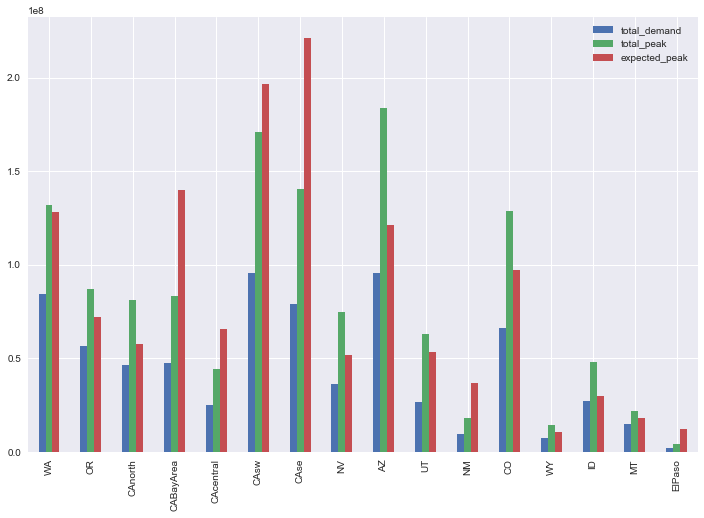

In [69]:
check1.plot.bar(y = ['total_demand', 'total_peak', 'expected_peak'], figsize = (12,8))

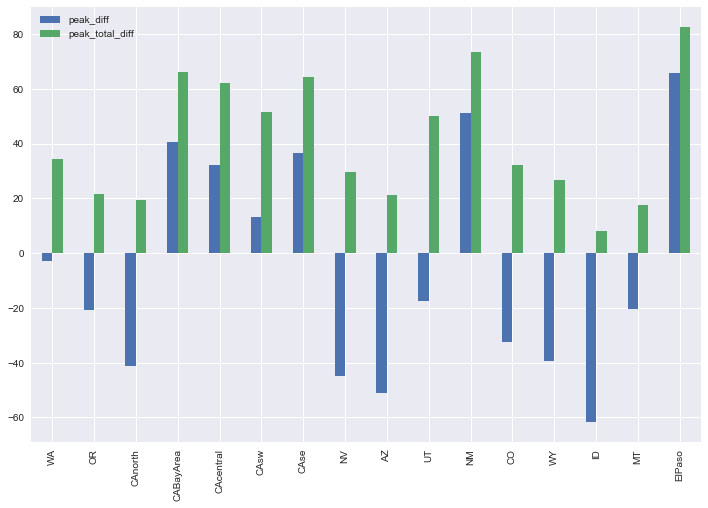

In [70]:
check1.plot.bar(y = ['peak_diff','peak_total_diff'],figsize = (12,8))
#Peak_total diffs are all > 0 -- GOOD
#Peak_diffs can be > 20% for some regions --- should this be a problem? But are max peaks used the right peaks? (Maybe they were imputed?)